In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd


In [3]:
file_path = './A0201.xls'

df = pd.read_excel(file_path,header=3)
df

,年 龄,合 计,Unnamed: 2,Unnamed: 3,汉 族,Unnamed: 5,Unnamed: 6,蒙 古 族,Unnamed: 8,Unnamed: 9,...,Unnamed: 168,基 诺 族,Unnamed: 170,Unnamed: 171,其他未识别的民族,Unnamed: 173,Unnamed: 174,外国人加入中国籍,Unnamed: 176,Unnamed: 177
0,NaN,合计,男,女,小计,男,女,小计,男,女,...,女,小计,男,女,小计,男,女,小计,男,女
1,总 计,1332810869,682329104,650481765,1220844520,625032848,595811672,5981840,2999520,2982320,...,1879,23143,11744,11399,640101,334908,305193,1448,557,891
2,0-4岁,75532610,41062566,34470044,66938873,36490186,30448687,409356,214483,194873,...,190,1865,961,904,54599,31155,23444,78,37,41
3,0,13786434,7461199,6325235,12127390,6576408,5550982,75717,39983,35734,...,41,395,203,192,10468,5990,4478,24,9,15
4,1,15657955,8574973,7082982,13885592,7628515,6257077,85620,44698,40922,...,34,390,194,196,10952,6313,4639,16,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,96,90889,28664,62225,84919,26577,58342,107,44,63,...,NaN,2,1,1,34,8,26,2,NaN,2
119,97,68648,22045,46603,63839,20306,43533,80,28,52,...,NaN,2,NaN,2,17,5,12,NaN,NaN,NaN
120,98,54689,18355,36334,50595,16833,33762,63,29,34,...,NaN,1,1,NaN,12,5,7,NaN,NaN,NaN
121,99,38231,12384,25847,35445,11389,24056,44,20,24,...,NaN,1,NaN,1,10,3,7,NaN,NaN,NaN


In [4]:
row_lables = df.index[:]
col_lables = df.columns[0]
age = df.loc[row_lables,col_lables].to_numpy()[1:]
age

array(['总  计', '0-4岁', '0', 1, 2, 3, 4, '5-9岁', 5, 6, 7, 8, 9, '10-14岁',
       10, 11, 12, 13, 14, '15-19岁', 15, 16, 17, 18, 19, '20-24岁', 20, 21,
       22, 23, 24, '25-29岁', 25, 26, 27, 28, 29, '30-34岁', 30, 31, 32, 33,
       34, '35-39岁', 35, 36, 37, 38, 39, '40-44岁', 40, 41, 42, 43, 44,
       '45-49岁', 45, 46, 47, 48, 49, '50-54岁', 50, 51, 52, 53, 54,
       '55-59岁', 55, 56, 57, 58, 59, '60-64岁', 60, 61, 62, 63, 64,
       '65-69岁', 65, 66, 67, 68, 69, '70-74岁', 70, 71, 72, 73, 74,
       '75-79岁', 75, 76, 77, 78, 79, '80-84岁', 80, 81, 82, 83, 84,
       '85-89岁', 85, 86, 87, 88, 89, '90-94岁', 90, 91, 92, 93, 94,
       '95-99岁', 95, 96, 97, 98, 99, '100岁及以上'], dtype=object)

In [5]:
#构建字典 一共三级 第一级：合计，汉族：{第二级：  男:{0-4岁：xxx，0：yy}}，蒙古族
d = {}
for i in df.columns[1:]:
    if "Unnamed" not in i :
        d[i] = {"小计":{},"男":{},"女":{}}
#找种族的值和索引的关系   由种族值得到列索引
def cal_col_index(nationality):
    for i in range(len(df.columns)):
        if df.columns[i] == nationality:
            return i
      

#检索nationality age_classes 下的值 即 小记
def retrieve_data_1(nationality,age_classes):
    row_lables = df.index[list(age).index(age_classes)+1]
    col_lables = df.columns[cal_col_index(nationality)]
    r = df.loc[row_lables,col_lables]
    return r
##检索nationality索引+1 age_classes 下的值 即 男
def retrieve_data_2(nationality,age_classes):
    row_lables = df.index[list(age).index(age_classes)+1]
    col_lables = df.columns[cal_col_index(nationality)+1]
    r = df.loc[row_lables,col_lables]
    return r
#女
def retrieve_data_3(nationality,age_classes):
    row_lables = df.index[list(age).index(age_classes)+1]
    col_lables = df.columns[cal_col_index(nationality)+2]
    r = df.loc[row_lables,col_lables]
    return r

for i in d:
#age是键，
    #z在d[i]
    for age_classes in age:
        d[i]["小计"][age_classes] = retrieve_data_1(i,age_classes)
        d[i]["男"][age_classes] = retrieve_data_2(i,age_classes)
        d[i]["女"][age_classes] = retrieve_data_3(i,age_classes)

    
    




In [6]:
d.keys()

dict_keys(['合    计', '汉    族', '蒙 古 族', '回    族', '藏    族', '维吾尔族', '苗    族', '彝    族', '壮    族', '布 依 族', '朝 鲜 族', '满    族', '侗    族', '瑶    族', '白    族', '土 家 族', '哈 尼 族', '哈萨克族', '傣    族', '黎    族', '傈 僳 族', '佤    族', '畲    族', '高 山 族', '拉 祜 族', '水    族', '东 乡 族', '纳 西 族', '景 颇 族', '柯尔克孜族', '土    族', '达斡尔族', '仫 佬 族', '羌    族', '布 朗 族', '撒 拉 族', '毛 南 族', '仡 佬 族', '锡 伯 族', '阿 昌 族', '普 米 族', '塔吉克族', '怒    族', '乌孜别克族', '俄罗斯族', '鄂温克族', '德 昂 族', '保 安 族', '裕 固 族', '京    族', '塔塔尔族', '独 龙 族', '鄂伦春族', '赫 哲 族', '门 巴 族', '珞 巴 族', '基 诺 族', '其他未识别的民族', '外国人加入中国籍'])

In [7]:
d['合    计'].keys()
# d['合    计']['小计'].keys()

dict_keys(['小计', '男', '女'])

In [8]:
#计算平均年龄函数
from cmath import nan


def cal_mean(l1,l2):
    total = d[l1][l2]["总  计"]
    count = 0
    for i in d[l1][l2].items() :
        if type(i[1]) != float:
            if type(i[0]) == int :
                count += i[0]*i[1]
                # 年龄 * 人数 / 总人数
                # data.append(i[0]*i[1]/d['合    计']["小计"]['总  计'])
                # print(i[0],i[1])
            
            elif i[0] == '100岁及以上':
                    count += 100*int(i[1])
    return count/total
#计算年龄中位数
def cal_median(l1,l2):
    median = d[l1][l2]["总  计"]/2
    for i in d[l1][l2].items() :
        if median > 0:
            if type(i[0]) == int :
                median -= d[l1][l2][i[0]]
                if median <= 0 :
                    return i[0]
        
            

        


#### 统计总人口、男、女平均年龄 

In [9]:
  
print("总人口平均年龄:%f"%cal_mean('合    计',"小计"))
print("男性平均年龄:%f"%cal_mean('合    计',"男"))
print("女性平均年龄:%f"%cal_mean('合    计',"女"))




总人口平均年龄:35.643577
男性平均年龄:35.110619
女性平均年龄:36.202629


#### 统计总人口、男、女中位数年龄

In [10]:

print("总人口年龄中位数:%d"%cal_median('合    计',"小计"))
print("男性年龄中位数:%d"%cal_median('合    计',"男"))
print("女性口年龄中位数:%d"%cal_median('合    计',"女"))


总人口年龄中位数:36
男性年龄中位数:36
女性口年龄中位数:36


In [11]:
x1 = []
for i in age:
    if type(i) == int:
        x1.append(i)
x1.append(100)
for i in x1:
    i -= 0.25
y1 = []
y2 = []
for i in d['合    计']["男"].items():
    if type(i[0]) == int :
        y1.append(int(i[1]))
y1.append(int(d['合    计']["男"]['100岁及以上']))
for i in d['合    计']["女"].items():
    if type(i[0]) == int :
        y2.append(int(i[1]))
y2.append(int(d['合    计']["女"]['100岁及以上']))
x2 = []
for i in x1:
    x2.append(i+0.5)

c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


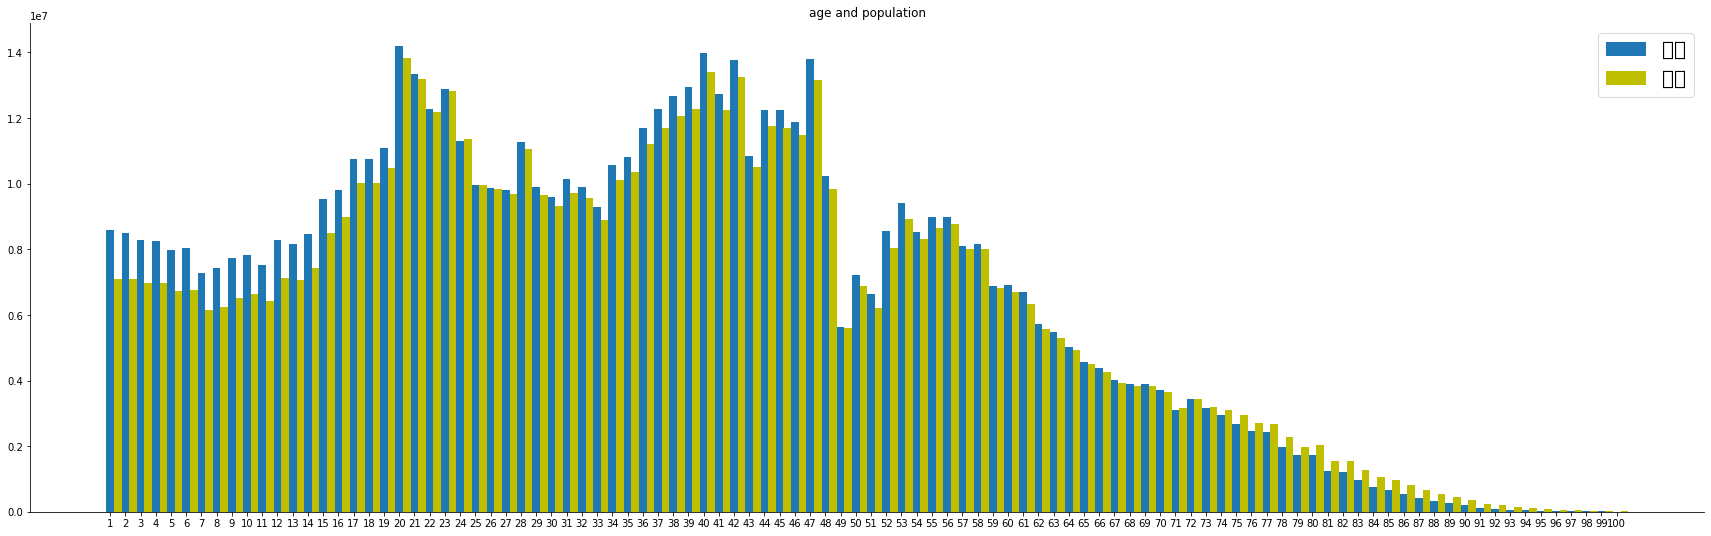

In [12]:
from cProfile import label
from turtle import width
import matplotlib.pyplot as plt

plt = plt.figure(figsize=(30,9))
ax = plt.subplots()
ax.set_title("age and population")
ax.set_xticks(x1)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.bar(x1,y1,width=0.5,label="男性")
ax.bar(x2,y2,width=0.5,color = "y",label = "女性")
ax.legend(prop = {'size':20})




#### 绘制人口直方图，x轴年龄，男女分开（y轴人口数归一化）

In [13]:
t1 = sum(y1)
t2 = sum(y2)
for i in range(len(y1)):
    y1[i] /= t1
for i in range(len(y2)):
    y2[i] /= t2



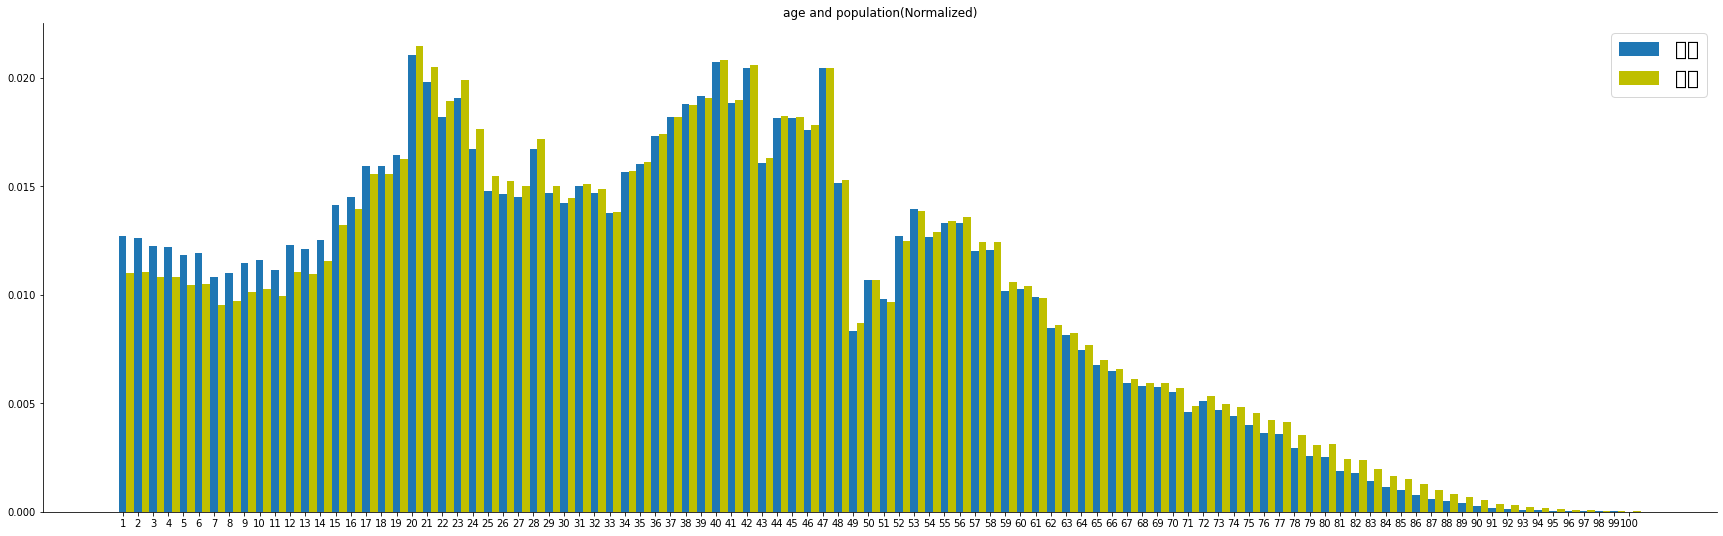

In [14]:
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(30,9))
ax = plt.subplots()
ax.set_title("age and population(Normalized)")
ax.set_xticks(x1)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.bar(x1,y1,width=0.5,label="男性")
ax.bar(x2,y2,width=0.5,color = "y",label = "女性")
ax.legend(prop = {'size':20})

#### 绘制饼图（每5岁为一单位）

In [15]:
x = []
pie_label = []
for i in d['合    计']['小计'].items():
    if type(i[0]) == str and i[0] != '总  计':
        pie_label.append(i[0])
        x.append(int(i[1]))


([<matplotlib.patches.Wedge at 0x1f7f2ecd000>,
 [Text(1.08296540414501, 0.19283654587508908, '0-4岁'),
  Text(1.0196448417037722, 0.41270376396016756, '0'),
  Text(0.9188253264518437, 0.6047809681782844, '5-9岁'),
  Text(0.6644296948754566, 0.8766602423788294, '10-14岁'),
  Text(0.26226787417589253, 1.0682769126847487, '15-19岁'),
  Text(-0.31407037454149983, 1.0542105102091148, '20-24岁'),
  Text(-0.8061063097240981, 0.7484601642191764, '25-29岁'),
  Text(-1.0553033269998808, 0.3103786204347568, '30-34岁'),
  Text(-1.0744558668206832, -0.23567899833165967, '35-39岁'),
  Text(-0.7802003722604663, -0.7754272236158787, '40-44岁'),
  Text(-0.27328093395097275, -1.0655128019591713, '45-49岁'),
  Text(0.19586549414084775, -1.082421686869291, '50-54岁'),
  Text(0.5772471358745117, -0.9363683805664698, '55-59岁'),
  Text(0.8471226072745807, -0.7017002837710106, '60-64岁'),
  Text(0.9861486155896866, -0.48735090845359547, '65-69岁'),
  Text(1.0552705380900227, -0.3104900826744621, '70-74岁'),
  Text(1.087052

c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23681 (\N{CJK UNIFIED IDEOGRAPH-5C81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21450 (\N{CJK UNIFIED IDEOGRAPH-53CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


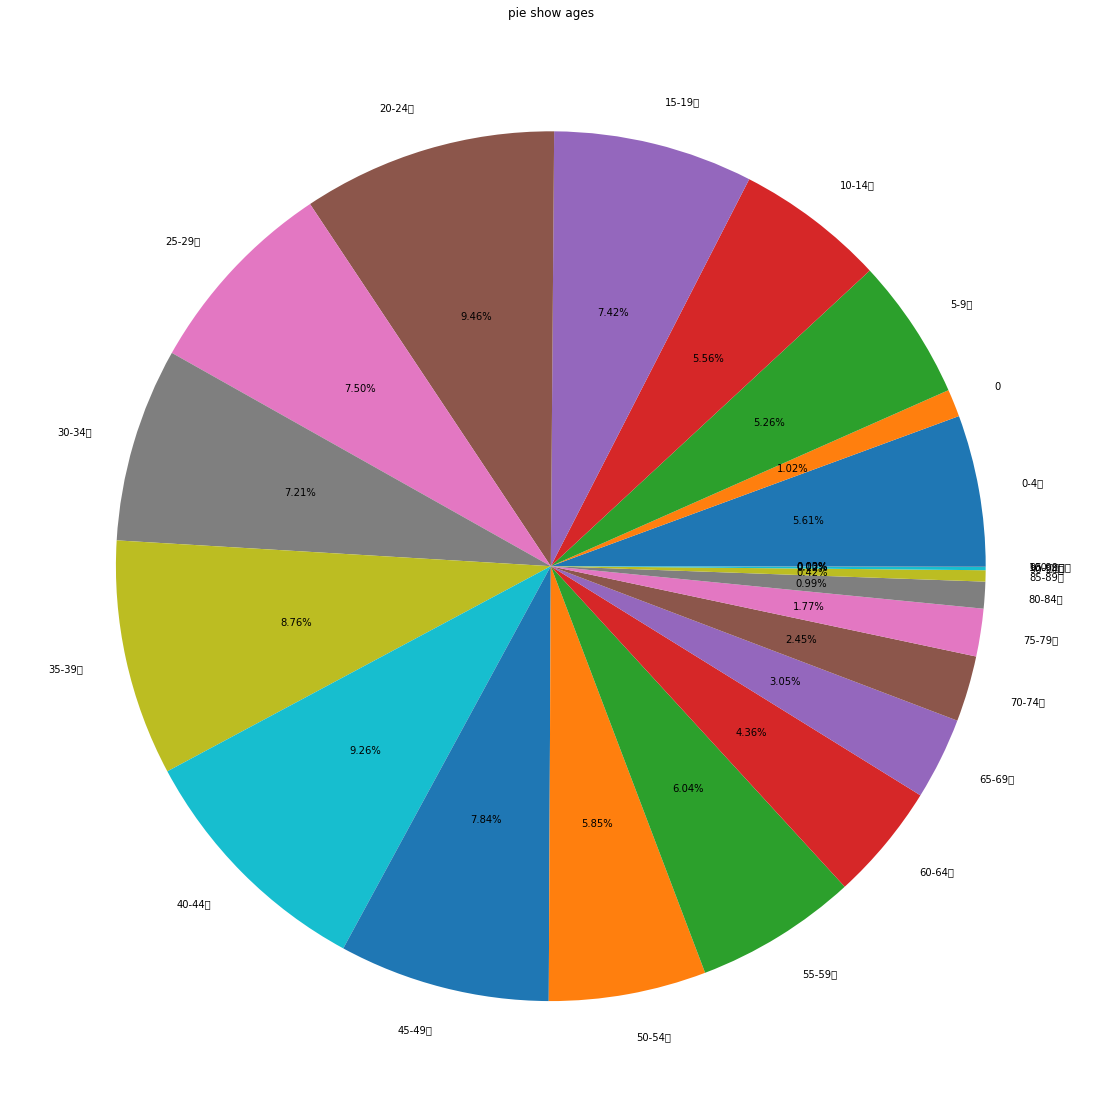

In [16]:
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(20,20))
ax = plt.subplots()
ax.set_title("pie show ages")

# ax.spines["right"].set_color("none")
# ax.spines["top"].set_color("none")
ax.pie(x,autopct='%.2f%%',labels=pie_label)

In [17]:
d['合    计']['小计']['100岁及以上']

'35934'

#### 统计各民族总人口、男、女平均年龄


In [18]:
for i in d:
    print("%s总人口平均年龄:%f  男性平均年龄:%f  女性平均年龄:%f"%(i,cal_mean(i,"小计"),cal_mean(i,"男"),cal_mean(i,"女")))


合    计总人口平均年龄:35.643577  男性平均年龄:35.110619  女性平均年龄:36.202629
汉    族总人口平均年龄:35.976477  男性平均年龄:35.431572  女性平均年龄:36.548106
蒙 古 族总人口平均年龄:31.867809  男性平均年龄:31.555428  女性平均年龄:32.181991
回    族总人口平均年龄:32.676086  男性平均年龄:32.311790  女性平均年龄:33.051661
藏    族总人口平均年龄:29.462274  男性平均年龄:28.969172  女性平均年龄:29.959960
维吾尔族总人口平均年龄:28.636651  男性平均年龄:28.794546  女性平均年龄:28.474759
苗    族总人口平均年龄:31.049130  男性平均年龄:30.484248  女性平均年龄:31.653026
彝    族总人口平均年龄:29.516605  男性平均年龄:28.949860  女性平均年龄:30.109754
壮    族总人口平均年龄:33.773284  男性平均年龄:32.830978  女性平均年龄:34.767367
布 依 族总人口平均年龄:31.636018  男性平均年龄:30.633651  女性平均年龄:32.667731
朝 鲜 族总人口平均年龄:41.011041  男性平均年龄:40.196953  女性平均年龄:41.816409
满    族总人口平均年龄:34.756569  男性平均年龄:34.941529  女性平均年龄:34.556191
侗    族总人口平均年龄:33.375032  男性平均年龄:32.831464  女性平均年龄:33.975795
瑶    族总人口平均年龄:31.275366  男性平均年龄:30.745321  女性平均年龄:31.853644
白    族总人口平均年龄:33.118468  男性平均年龄:32.841578  女性平均年龄:33.402461
土 家 族总人口平均年龄:33.486518  男性平均年龄:33.315530  女性平均年龄:33.668518
哈 尼 族总人口平均年龄:30.749840  男性平均年龄:29.897316  女性平均

#### 统计各民族总人口、男、女中位数年龄

In [19]:
for i in d:
    print("%s总人口中位年龄:%s  男性中位年龄:%s  女性中位年龄:%s"%(i,cal_median(i,"小计"),cal_median(i,"男"),cal_median(i,"女")))


合    计总人口中位年龄:36  男性中位年龄:36  女性中位年龄:36
汉    族总人口中位年龄:36  男性中位年龄:36  女性中位年龄:37
蒙 古 族总人口中位年龄:31  男性中位年龄:31  女性中位年龄:32
回    族总人口中位年龄:32  男性中位年龄:32  女性中位年龄:32
藏    族总人口中位年龄:28  男性中位年龄:28  女性中位年龄:28
维吾尔族总人口中位年龄:27  男性中位年龄:27  女性中位年龄:27
苗    族总人口中位年龄:30  男性中位年龄:30  女性中位年龄:31
彝    族总人口中位年龄:29  男性中位年龄:28  女性中位年龄:29
壮    族总人口中位年龄:33  男性中位年龄:33  女性中位年龄:34
布 依 族总人口中位年龄:31  男性中位年龄:30  女性中位年龄:32
朝 鲜 族总人口中位年龄:42  男性中位年龄:41  女性中位年龄:43
满    族总人口中位年龄:35  男性中位年龄:36  女性中位年龄:35
侗    族总人口中位年龄:34  男性中位年龄:33  女性中位年龄:35
瑶    族总人口中位年龄:30  男性中位年龄:30  女性中位年龄:31
白    族总人口中位年龄:33  男性中位年龄:33  女性中位年龄:33
土 家 族总人口中位年龄:34  男性中位年龄:34  女性中位年龄:34
哈 尼 族总人口中位年龄:30  男性中位年龄:29  女性中位年龄:31
哈萨克族总人口中位年龄:29  男性中位年龄:29  女性中位年龄:29
傣    族总人口中位年龄:32  男性中位年龄:32  女性中位年龄:32
黎    族总人口中位年龄:29  男性中位年龄:29  女性中位年龄:29
傈 僳 族总人口中位年龄:30  男性中位年龄:30  女性中位年龄:30
佤    族总人口中位年龄:30  男性中位年龄:30  女性中位年龄:30
畲    族总人口中位年龄:34  男性中位年龄:34  女性中位年龄:33
高 山 族总人口中位年龄:32  男性中位年龄:32  女性中位年龄:31
拉 祜 族总人口中位年龄:31  男性中位年龄:31  女性中位年龄:31
水    族总人口中位年龄:29  男性中位年龄:28  女性中位年龄:3

#### 绘制人口直方图，x轴各民族，y轴人口数


In [20]:
x = []
y = []
for i in d:
    if i != "合    计":
        x.append(i)
        


for i in d:
    if i != "合    计":
        y.append(d[i]['小计']['总  计'])





<BarContainer object of 58 artists>

c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27721 (\N{CJK UNIFIED IDEOGRAPH-6C49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33945 (\N{CJK UNIFIED IDEOGRAPH-8499}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21476 (\N{CJK UNIFIED IDEOGRAPH-53E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17323\AppData\Local\Programs\Python\Python310\lib\site-packages

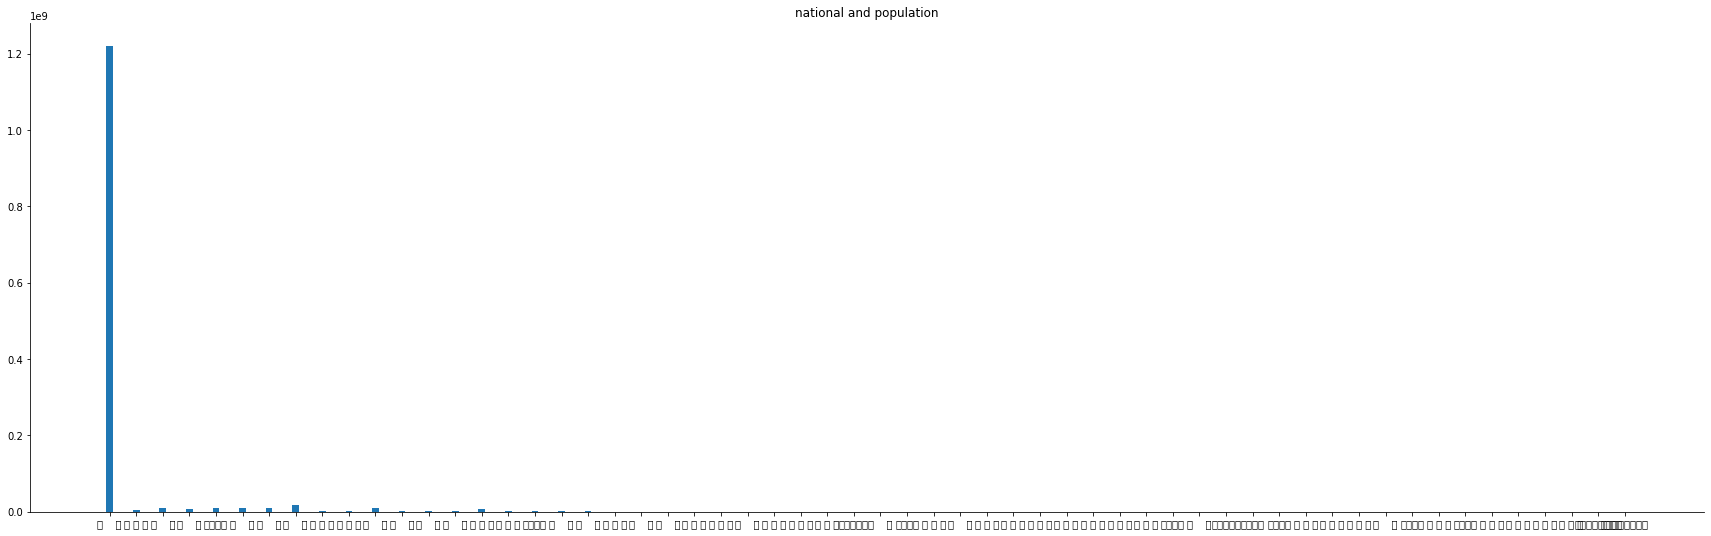

In [21]:

import matplotlib.pyplot as plt

plt = plt.figure(figsize=(30,9))
ax = plt.subplots()
ax.set_title("national and population")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.bar(x,y,width=0.25)




In [22]:
d["合    计"]['小计']

{'总  计': 1332810869,
 '0-4岁': 75532610,
 '0': 13786434,
 1: 15657955,
 2: 15617375,
 3: 15250805,
 4: 15220041,
 '5-9岁': 70881549,
 5: 14732137,
 6: 14804470,
 7: 13429161,
 8: 13666956,
 9: 14248825,
 '10-14岁': 74908462,
 10: 14454357,
 11: 13935714,
 12: 15399559,
 13: 15225032,
 14: 15893800,
 '15-19岁': 99889114,
 15: 18024484,
 16: 18790521,
 17: 20775369,
 18: 20755274,
 19: 21543466,
 '20-24岁': 127412518,
 20: 28026954,
 21: 26556649,
 22: 24474192,
 23: 25695955,
 24: 22658768,
 '25-29岁': 101013852,
 25: 19933683,
 26: 19709177,
 27: 19480836,
 28: 22322147,
 29: 19568009,
 '30-34岁': 97138203,
 30: 18928369,
 31: 19866458,
 32: 19474874,
 33: 18179478,
 34: 20689024,
 '35-39岁': 118025959,
 35: 21186516,
 36: 22906980,
 37: 23990208,
 38: 24730460,
 39: 25211795,
 '40-44岁': 124753964,
 40: 27397219,
 41: 24956297,
 42: 27032542,
 43: 21355748,
 44: 24012158,
 '45-49岁': 105594553,
 45: 23962574,
 46: 23355778,
 47: 26972157,
 48: 20075084,
 49: 11228960,
 '50-54岁': 78753171,
 50: 

In [23]:
x

['汉    族',
 '蒙 古 族',
 '回    族',
 '藏    族',
 '维吾尔族',
 '苗    族',
 '彝    族',
 '壮    族',
 '布 依 族',
 '朝 鲜 族',
 '满    族',
 '侗    族',
 '瑶    族',
 '白    族',
 '土 家 族',
 '哈 尼 族',
 '哈萨克族',
 '傣    族',
 '黎    族',
 '傈 僳 族',
 '佤    族',
 '畲    族',
 '高 山 族',
 '拉 祜 族',
 '水    族',
 '东 乡 族',
 '纳 西 族',
 '景 颇 族',
 '柯尔克孜族',
 '土    族',
 '达斡尔族',
 '仫 佬 族',
 '羌    族',
 '布 朗 族',
 '撒 拉 族',
 '毛 南 族',
 '仡 佬 族',
 '锡 伯 族',
 '阿 昌 族',
 '普 米 族',
 '塔吉克族',
 '怒    族',
 '乌孜别克族',
 '俄罗斯族',
 '鄂温克族',
 '德 昂 族',
 '保 安 族',
 '裕 固 族',
 '京    族',
 '塔塔尔族',
 '独 龙 族',
 '鄂伦春族',
 '赫 哲 族',
 '门 巴 族',
 '珞 巴 族',
 '基 诺 族',
 '其他未识别的民族',
 '外国人加入中国籍']

#### 绘制各民族饼图


([<matplotlib.patches.Wedge at 0x1f7f3ef7ac0>,
 [Text(-1.0619128792532428, 0.28695127962092726, ''),
  Text(0.9580060930763251, -0.5405777701946647, ''),
  Text(0.9783812374001316, -0.5027625227713254, ''),
  Text(0.9975928084626186, -0.46347447448987467, ''),
  Text(1.014710966238916, -0.4246900693382006, ''),
  Text(1.0331486412516282, -0.3776292958443699, ''),
  Text(1.04834646851788, -0.33312112203534855, ''),
  Text(1.0665533851657576, -0.2691911525133458, ''),
  Text(1.0779490163842003, -0.21914816466567882, ''),
  Text(1.0803111113455255, -0.2071904985837813, ''),
  Text(1.0858296165230408, -0.17599444275722534, ''),
  Text(1.0908018196507672, -0.14195559251602416, ''),
  Text(1.0926033562635307, -0.12734954213372188, ''),
  Text(1.0939551294394452, -0.1151615160247849, ''),
  Text(1.0964257632603167, -0.08860330501190293, ''),
  Text(1.0982116755237048, -0.0626986103786755, ''),
  Text(1.0986435252448112, -0.05461139476019639, ''),
  Text(1.0989715132353695, -0.0475564201466268

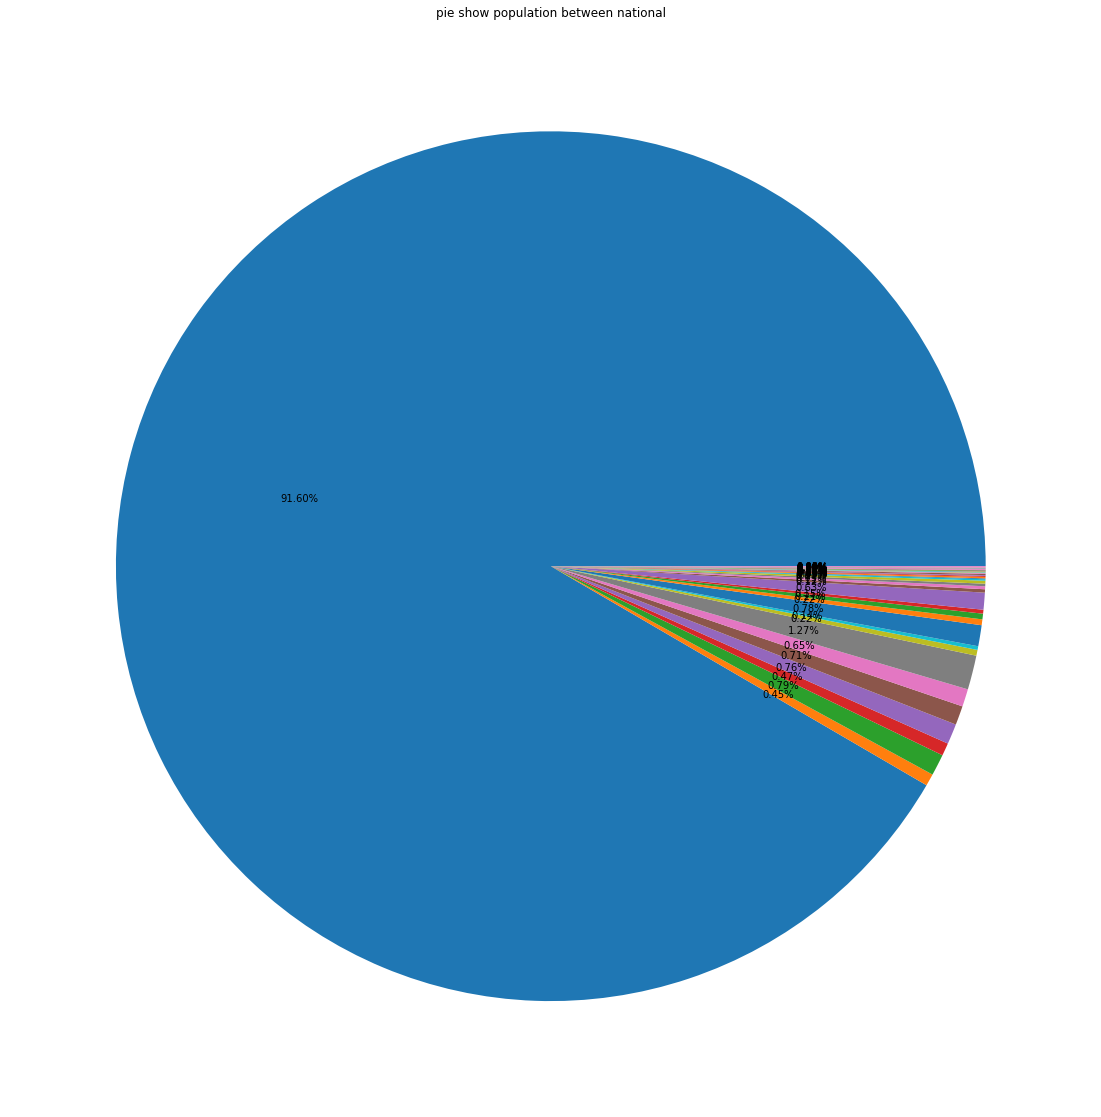

In [24]:
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(20,20))
ax = plt.subplots()
ax.set_title("pie show population between national")
pie_lable = x 
ax.pie(y,autopct='%.2f%%')



ModuleNotFoundError: No module named 'pytorch'